In [1]:
import sys
sys.path.append('../../')
#sys.path.append('../../../pyswip/')

In [2]:
from problog.program import PrologString
from prolog_engine import PrologEngine
from problog.formula import LogicFormula

In [3]:
prog1='''
forall(A,B) :- \+ (A, \+ B).
d :- forall(a(X), X>0).
a(1) :- true.
'''
program = PrologString(prog1)

In [4]:
engine = PrologEngine()

In [5]:
sp = engine.prepare(program)
print(sp)

cl(forall(A1,A2),neg((call(A1),neg(call(A2))))).
cl(d,forall(a(A1),A1>0)).
cl(a(1),true).


In [6]:
formula = LogicFormula(keep_all=False)
formula = engine.ground(sp, 'd')

:-(a(1),true)
:-(call(a(1)),a(1))
:-(forall(a(_1932),>(_1932,0)),neg(,(call(a(_1932)),neg(call(>(_1932,0))))))
:-(d,forall(a(_1904),>(_1904,0)))


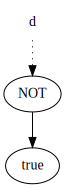

In [7]:
from graphviz import Source

Source(formula.to_dot())

In [8]:
from problog.sdd_formula import SDD

In [9]:
sdd = SDD.create_from(formula)

In [10]:
sdd.evaluate()

{}